# **Write like a Consultant M? B? B?**

Author: Rongin Ye

Date: Feb 29, 2020

Course: Unstructured Data Analysis

Professor: Seth Berry

## *Disclaimer*
This an academic program developed by Rongbin Ye for the purpose of academic research as part of the Unstructured Data Analysis course project at university of Notre Dame. All the data is retrieved through downloads from the offical website. 

Unauthorized usage for any purpose is prohibited. All rights reserved. Rongbin Ye. 2020. 

## Executive Summary

This program is for academic usage of Rongbin Ye, a MSBA candidate at University of Notre Dame for Unstructured Data Analysis. The major purpose of this program is to investigate the language patterns of the consultants and researchers in the different consulting firms. Natural Language Analysis, such as term frequency and Bigram analysis. Three main deliverables will be:

1. Three word clouds demonstrating the 
2. A key visualization showing the word choices.
3. An Bigram analysis will be conducted.

This will help my professor, peers and myself to cultivate a better understand of consulting industries and the preference of language usages in different firms.

## *Purpose of Study*
In this data project, the students are asked to conduct a Natural Language Process. Per that requirement, I decided to collect data from twitters of major consulting firms, MBBs. The tweets are major resources for me to learn about management consulting and business. There are two major things interested me a lot. 

> 1. Similar Patterns: Is there any common pattern of the word usage and tones usage across different firms ? The null hypothesis is that there is certain habits and combination of vocabularies they would love to use.

> 2. Change of Terms: Are there critical differences？The null hypothesis is that there is a basket of words and combination of vocabularies firms use differently.

The first question will be answered via the exploration of term frequency and sentimental scores. The final output will be a wordcloud showing the 50 words that appears the most. A special focus will be on the verbs. Furthermore, a word network will be applied to top5 words to demonstrate the connection.

The second question will be answered via the comparison across the different topic models developed based on the data of each year. The final output will be a distribution visualization demonstrating the change over time. 

# *Data Used*
The major data will be collected from the Pdfs via downloads and selection, Which majorly focusing in the field of Digitalization and AI strategies. Multiple files from three consultancies will be collected and analyzed into page by page tokens. In the end, one of the key deliverable is a preliminary classifier for or sentence here. 

Here is the full list of records of what articles/discussion/insights I have been used. 
reference:
A. Mckinsey
    1. Artificial intelligence in the United Kingdom: Prospects and challenges
    2. Generation Z and its implications for companies
    3. The analytics academy: Bridging the gap between human and artificial intelligence
    4. Mckinsey Global Institute: Connected World
    5. Mckinsey Global Institute: Innovation
    6. Mckinsey Global Institute: Future of Asia
B. BCG
    1. A ROUGH ROAD TO DATA MATURITY
    2. The Power of Algorithmic Forecasting
    3. FOR COMPANIES,COGNITION IS A TERRIBLE THING TO WASTE
    4. THE FIVE RULES OF DIGITAL STRATEGY
C. Bain
    1. Telco 2030: Wait-and-See Is No Longer an Option
    2. Digital Transformation for Utilities: More Tortoise, Less Hare
    3. Learning from the Digital Leaders
    4. The Digital Enterprise: Moving from experimentation to transformation

In [1]:
import os
import pandas as pd
import PyPDF2
# For Data Cleaning/ Sub
import re
import string
# For Data Analysis
import nltk
# Import necessary modules
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
# Lemmatization
from nltk.stem import WordNetLemmatizer 
# Stopwords
from nltk.corpus import stopwords 
# Visualization
import wordcloud as wd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# For Mckinsey
# Load the Path
os.chdir("/Users/rongbin/Consulting_Wording/Mck/")
Mcklist = os.listdir()
# Create a Storage
Mck_All = ""

# Load Data into Lists
for pdf in Mcklist:
    print(pdf)
    Adress = '/Users/rongbin/Consulting_Wording/Mck/' + str(pdf)
    pdfFileobj = open(Adress, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileobj)
    for j in range(pdfReader.numPages):
        pageObj = pdfReader.getPage(j)
        parse0 = pageObj.extractText()
        Name = pdf
        Mck_All = Mck_All + parse0

MGI2_Innovation.pdf


Mck3_Analytics.pdf
MGI4_DigitalEU.pdf
MGI3_AIrisk.pdf
Mck1_AI.pdf
MGI1_Developof5G.pdf


For BCG & Bain, there are some additional work to decrypt the document. 

In [3]:
# For BCG
# Load the Path
os.chdir("/Users/rongbin/Consulting_Wording/BCG/")
BCGlist = os.listdir()
# Create a Storage
BCG_All = ""

# Load Data into Lists
for pdf in BCGlist:
    print(pdf)
    Adress = "/Users/rongbin/Consulting_Wording/BCG/" + str(pdf)
    pdfFileobj = open(Adress, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileobj)
    if pdfReader.isEncrypted:
        pdfReader.decrypt('')
    for j in range(pdfReader.numPages):
        pageObj = pdfReader.getPage(j)
        parse0 = pageObj.extractText()
        Name = pdf
        BCG_All = BCG_All + parse0
        

BCG4_Ditigalization.pdf
BCG1_Data.pdf
BCG3_Ditigalization.pdf
BCG2_Forecasting.pdf


In [4]:
# For Bain
# Load the Path
os.chdir("/Users/rongbin/Consulting_Wording/Bain1/")
Bainlist = os.listdir()
# Create a Storage
Bain_All = ''

# Load Data into Lists
for pdf in Bainlist:
    print(pdf)
    Adress = "/Users/rongbin/Consulting_Wording/Bain1/" + str(pdf)
    pdfFileobj = open(Adress, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileobj)
    if pdfReader.isEncrypted:
        pdfReader.decrypt('')
    for j in range(pdfReader.numPages):
        pageObj = pdfReader.getPage(j)
        parse0 = pageObj.extractText()
        Name = pdf
        Bain_All = Bain_All + parse0

bain3_digital_leaders.pdf
bain2_digitalization_utilities.pdf
bain1_TMT.pdf
bain4_digitalization_execution.pdf


## Data Cleaning

There are few things I would like to take care of during the data cleaning part. 
    1. Numbers
    2. Signs
    3. \n
    4. Punctuations
    5. white spaces
    6. Graphs which can not been read: 
    
In regarding these, 

In [5]:
# Preliminary Cleaning
Mck_c = Mck_All
Bain_c = Bain_All
BCG_c = BCG_All

# Data Cleaning Items
digits = r"\d+"
sign = r"\n"
url = r"[http]\:\//\w+\.\w+"
'Email = r"\.com"'
random = r"[˘˜˚‰ˆœšˇ–‡ƒ˙…‹˝""‘’•€”‚⁄˛ÿ™“„†›„—()łž.,':;=/&''@#˚!?-]"

In [6]:
# Preliminary Clean up - Mck
    # Lower case
Mck_c = Mck_c.lower()
    # replace numbers
Mck_c = re.sub(digits, " ", Mck_c)
    # replace \n 
Mck_c = re.sub(sign, " ", Mck_c)
    # replace graphs
Mck_c = re.sub(random, " ", Mck_c)

#Mck_c

In [7]:
# Preliminary Clean up - Bain
# Lower case
Bain_c = Bain_c.lower()
# replace numbers
Bain_c = re.sub(digits, " ", Bain_c)
# replace \n 
Bain_c = re.sub(sign, " ", Bain_c)
# replace graphs
Bain_c = re.sub(random, " ", Bain_c)

#Bain_c

In [8]:
# Preliminary Clean up - BCG
# Lower case
BCG_c = BCG_c.lower()
    # replace numbers
BCG_c = re.sub(digits, " ", BCG_c)
    # replace \n 
BCG_c = re.sub(sign, " ", BCG_c)
    # replace graphs
BCG_c = re.sub(random, " ", BCG_c)
#BCG_c

 ## Advanced Data Cleaning
 
 There are some issues can only fix via new functions. For example, we need to fix the white spaces left by the replacement and filter the filter words. After that, we could probably conduct the breakdown the sentences into meaningful chucks for analysis. 

In [9]:
## Define Common Filter
lemmatizer = WordNetLemmatizer()

def remove_whitespace(text): 
    return  " ".join(text.split()) 

def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 

# lemmatize string - after remove stopwords
def lemmatize_word(text): 
    word_tokens = text
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 

# punctuation Cleaner
import string
table = str.maketrans('', '', string.punctuation)
def cleaner(words):
    stripped = [word for word in word_tokens if wor]
    return stripped

In [10]:
# Mck Cleaning
Mck_c = remove_whitespace(Mck_c)
    # Change the text into token afterwards
Mck_c = remove_stopwords(Mck_c)
    # It is already in tokens' form
Mck_c = lemmatize_word(Mck_c)
# Maintain a Text form
All_M = ''
for i in Mck_c:
    All_M =  All_M + i + ' '
Mck_c = All_M
#Mck_c

In [11]:
#BCG Cleaning
BCG_c = remove_whitespace(BCG_c)
    # Change the text into token afterwards
BCG_c = remove_stopwords(BCG_c)
    # It is already in tokens' form
BCG_c = lemmatize_word(BCG_c)
# Maintain a Text form
All_BCG = ''
for i in BCG_c:
    All_BCG =  All_BCG + i + ' '
BCG_c = All_BCG
#BCG_c

In [12]:
# Bain Cleaning
Bain_c0 = remove_whitespace(Bain_c)
    # Change the text into token afterwards
Bain_c1 = remove_stopwords(Bain_c0)
    # It is already in tokens' form
Bain_c2 = lemmatize_word(Bain_c1)
# Maintain a Text form
All_Bain = ''
for i in Bain_c2:
    All_Bain =  All_Bain + i + ' '
Bain_c = All_Bain

Awesome, so far, we have cleaned the data of these three groups of pdfs. Lets head into analysis. 

# Explantory Data Analysis
In this section, I would majorly examine the language patterns, especially in the sentences and the term freqency. Lets see the comaprative ratio that the term-idf comparing to their own chucks accordingly. 
1. Word Cloud
2. Term frequency - IDF
3. N-Gram

### WordCloud For Mck

In [13]:
stop_words = set(stopwords.words("english")) 
wordcloud_Mck = wd.WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate_from_text(Mck_c)

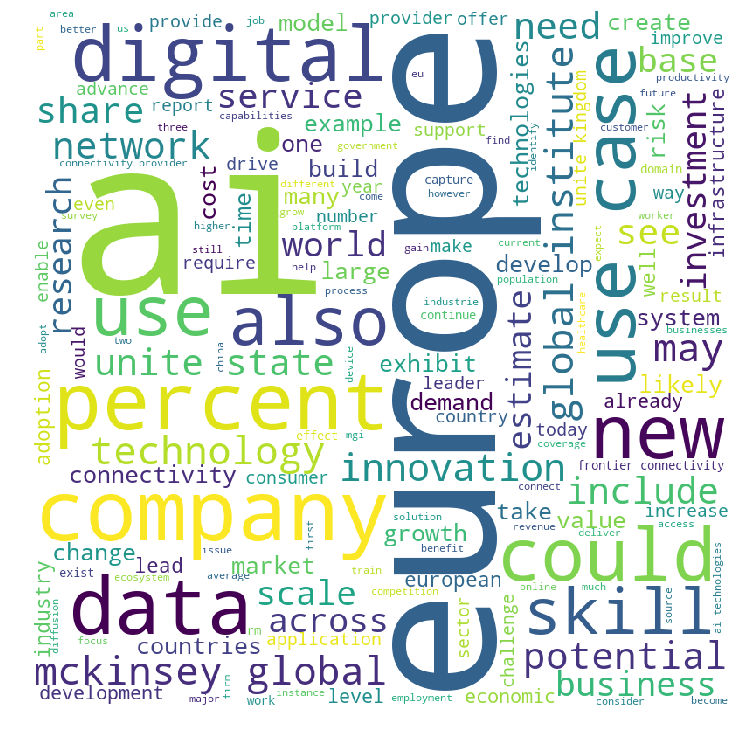

In [14]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud_Mck) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

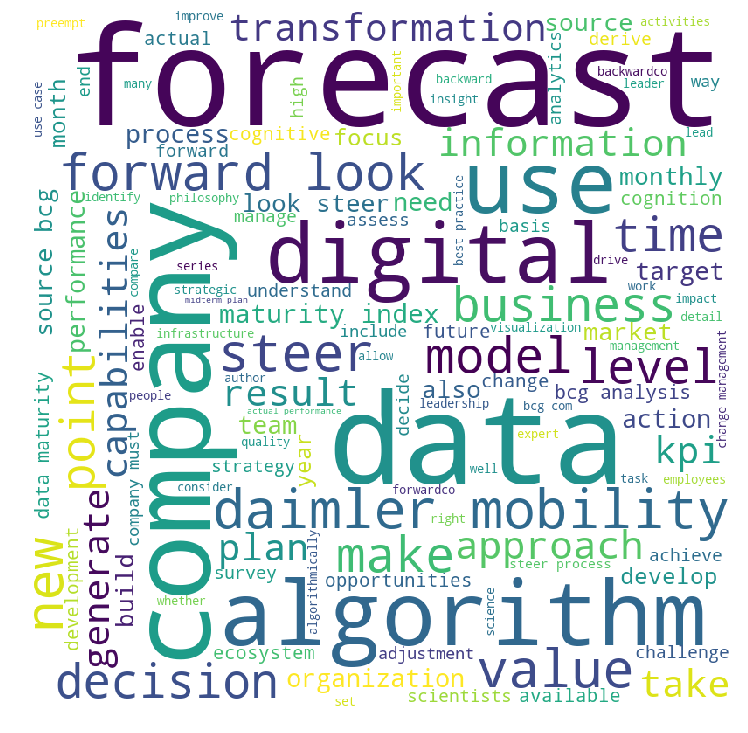

In [15]:
# For BCG
stop_words = set(stopwords.words("english")) 
wordcloud_BCG = wd.WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate_from_text(BCG_c)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud_BCG) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

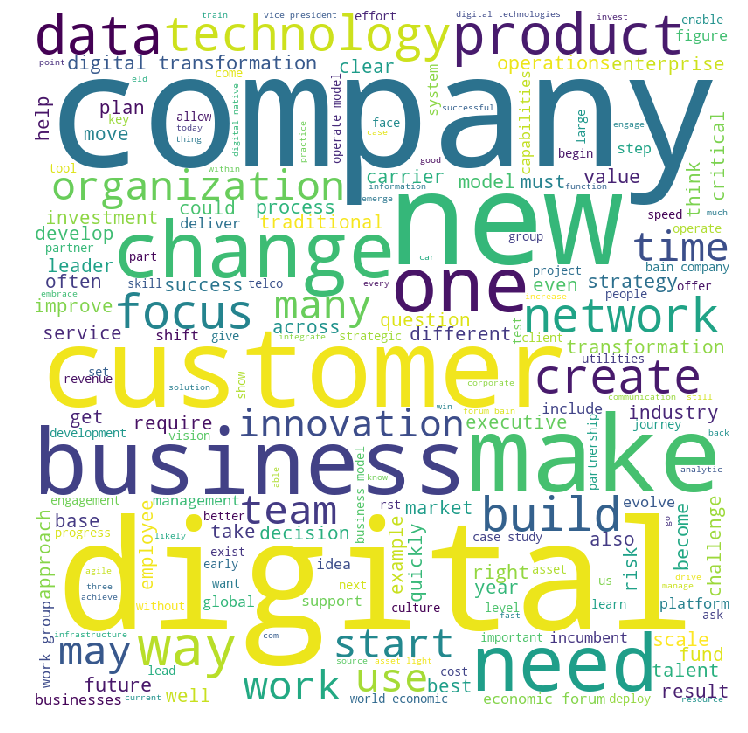

In [16]:
# Bain
stop_words = set(stopwords.words("english")) 
wordcloud_Bain = wd.WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate_from_text(Bain_c)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud_Bain) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

Findings:
Indeed, after comparing the word cloud of these three firms, we already capable of driving some potential 

## Term Frequency - IDF

In [17]:
McK_Words = sorted(word_tokenize(Mck_c))
len(set(McK_Words))

5389

In [18]:
BCG_Words = sorted(word_tokenize(BCG_c))
len(set(BCG_Words))

1083

In [19]:
Bain_Words = sorted(word_tokenize(Bain_c))
len(set(Bain_Words))

3321

In [20]:
# Mckinsey
Mck_dist1 = nltk.FreqDist(McK_Words)
Mck_dist1.most_common(50)

[('ai', 929),
 ('use', 486),
 ('europe', 445),
 ('digital', 418),
 ('company', 407),
 ('connectivity', 386),
 ('percent', 367),
 ('data', 365),
 ('could', 364),
 ('global', 353),
 ('mckinsey', 319),
 ('european', 310),
 ('new', 292),
 ('case', 275),
 ('network', 262),
 ('technologies', 241),
 ('unite', 228),
 ('may', 210),
 ('advance', 207),
 ('world', 202),
 ('also', 201),
 ('business', 201),
 ('countries', 198),
 ('market', 198),
 ('g', 197),
 ('growth', 195),
 ('innovation', 192),
 ('research', 190),
 ('value', 190),
 ('need', 185),
 ('state', 184),
 ('technology', 180),
 ('potential', 176),
 ('skills', 176),
 ('frontier', 175),
 ('institute', 174),
 ('time', 161),
 ('include', 159),
 ('service', 159),
 ('share', 159),
 ('adoption', 154),
 ('model', 154),
 ('economic', 151),
 ('see', 151),
 ('providers', 144),
 ('base', 142),
 ('$', 138),
 ('ﬂ', 135),
 ('across', 134),
 ('investment', 134)]

In [21]:
#BCG
BCG_dist1 = nltk.FreqDist(BCG_Words)
BCG_dist1.most_common(50)

[('data', 48),
 ('forecast', 48),
 ('company', 37),
 ('steer', 34),
 ('bcg', 26),
 ('use', 22),
 ('forward', 20),
 ('look', 20),
 ('maturity', 20),
 ('daimler', 18),
 ('source', 18),
 ('digital', 16),
 ('mobility', 16),
 ('plan', 16),
 ('process', 16),
 ('new', 15),
 ('performance', 15),
 ('point', 15),
 ('value', 15),
 ('%', 14),
 ('make', 13),
 ('model', 13),
 ('algorithms', 12),
 ('approach', 12),
 ('business', 12),
 ('change', 12),
 ('index', 12),
 ('level', 12),
 ('time', 12),
 ('capabilities', 11),
 ('generate', 11),
 ('information', 11),
 ('result', 11),
 ('take', 11),
 ('action', 10),
 ('management', 10),
 ('must', 10),
 ('need', 10),
 ('survey', 10),
 ('target', 10),
 ('team', 10),
 ('transformation', 10),
 ('actual', 9),
 ('also', 9),
 ('best', 9),
 ('build', 9),
 ('market', 9),
 ('monthly', 9),
 ('organization', 9),
 ('analysis', 8)]

In [22]:
#Bain
Bain_dist1 = nltk.FreqDist(Bain_Words)
Bain_dist1.most_common(50)

[('digital', 314),
 ('company', 270),
 ('new', 146),
 ('business', 125),
 ('model', 107),
 ('make', 105),
 ('need', 99),
 ('technology', 90),
 ('data', 87),
 ('work', 86),
 ('customer', 74),
 ('change', 68),
 ('team', 67),
 ('transformation', 65),
 ('network', 64),
 ('customers', 61),
 ('build', 58),
 ('focus', 58),
 ('group', 58),
 ('time', 58),
 ('create', 57),
 ('one', 56),
 ('%', 54),
 ('start', 52),
 ('many', 51),
 ('may', 51),
 ('take', 51),
 ('way', 50),
 ('service', 49),
 ('use', 48),
 ('value', 48),
 ('product', 47),
 ('strategy', 47),
 ('market', 46),
 ('process', 45),
 ('bain', 44),
 ('future', 44),
 ('operate', 44),
 ('operations', 44),
 ('become', 43),
 ('right', 43),
 ('scale', 43),
 ('organization', 42),
 ('get', 41),
 ('industry', 41),
 ('require', 41),
 ('approach', 40),
 ('could', 40),
 ('critical', 40),
 ('economic', 40)]

Based on the help of NLTK, we are able to utilize the benefits to detect which of three firms' usage of long, long words in the report. (Which is my thing.)

In [23]:
Mck_dist1 = nltk.FreqDist(McK_Words)
Boring_MCK = sorted(w for w in set(McK_Words) if len(w) > 9 and Mck_dist1[w] > 9)
Boring_Index_MCK = len(Boring_MCK)/len(McK_Words)
Boring_Index_MCK

0.003278567062440958

In [24]:
BCG_dist1 = nltk.FreqDist(BCG_Words)
Boring_BCG = sorted(w for w in set(BCG_Words) if len(w) > 9 and BCG_dist1[w] > 9)
Boring_Index_BCG = len(Boring_BCG)/len(BCG_Words)
Boring_Index_BCG

0.002205071664829107

In [25]:
Bain_dist1 = nltk.FreqDist(Bain_Words)
Boring_Bain = sorted(w for w in set(BCG_Words) if len(w) > 9 and BCG_dist1[w] > 9)
Boring_Index_Bain = len(Boring_Bain)/len(Bain_Words)
Boring_Index_Bain

0.0003767660910518053

Nerdy me decided to further investigate the pattern of usage by the NLTK package. Let see what kind of word the consultants used the most. 

In [26]:
Mck_Dummy_count = nltk.FreqDist(len(w) for w in McK_Words)
Mck_Dummy_15=Mck_Dummy_count.most_common(15)
Mck_Dummy_15

[(7, 8534),
 (6, 7806),
 (5, 7516),
 (4, 7194),
 (8, 5830),
 (9, 3658),
 (3, 3632),
 (10, 3227),
 (12, 1760),
 (11, 1579),
 (2, 1429),
 (1, 865),
 (13, 526),
 (14, 269),
 (15, 87)]

In [27]:
BCG_Dummy_count = nltk.FreqDist(len(w) for w in BCG_Words)
BCG_Dummy_15 = BCG_Dummy_count.most_common(15)
BCG_Dummy_15

[(7, 430),
 (4, 404),
 (6, 394),
 (5, 353),
 (8, 313),
 (3, 188),
 (9, 174),
 (10, 146),
 (11, 107),
 (1, 52),
 (12, 52),
 (2, 33),
 (14, 28),
 (13, 28),
 (15, 12)]

In [28]:
Bain_Dummy_count = nltk.FreqDist(len(w) for w in Bain_Words)
Bain_Dummy_15 = Bain_Dummy_count.most_common(15)
Bain_Dummy_15

[(4, 2615),
 (7, 2570),
 (5, 2404),
 (6, 2098),
 (8, 1476),
 (3, 1110),
 (9, 1046),
 (10, 974),
 (11, 500),
 (12, 358),
 (2, 207),
 (1, 160),
 (14, 144),
 (13, 138),
 (15, 57)]

In [29]:
# All Habits
# Mck Habits
MCK_Dummy_DF = pd.DataFrame(Mck_Dummy_15)
MCK_Dummy_DF = MCK_Dummy_DF.rename(columns={0: "Counts0", 1: "Frequency"})
MCK_Dummy_DF["Frequency"] = MCK_Dummy_DF["Frequency"]/len(McK_Words)
MCK_Dummy_DF = MCK_Dummy_DF.set_index("Counts0")

# BCG Habits
BCG_Dummy_DF = pd.DataFrame(BCG_Dummy_15)
BCG_Dummy_DF = BCG_Dummy_DF.rename(columns={0: "Counts0", 1: "Frequency"})
BCG_Dummy_DF["Frequency"]= BCG_Dummy_DF["Frequency"]/len(BCG_Words)
BCG_Dummy_DF = BCG_Dummy_DF.set_index("Counts0")

# Bain Habits
Bain_Dummy_DF = pd.DataFrame(Bain_Dummy_15)
Bain_Dummy_DF = Bain_Dummy_DF.rename(columns={0: "Counts0", 1: "Frequency"})
Bain_Dummy_DF["Frequency"] = Bain_Dummy_DF["Frequency"]/len(Bain_Words)
Bain_Dummy_DF = Bain_Dummy_DF.set_index("Counts0")


All_Dummy = MCK_Dummy_DF.join(BCG_Dummy_DF, lsuffix='_MCK', rsuffix='_BCG')
All_Dummy_Frequency = All_Dummy.join(Bain_Dummy_DF, rsuffix= '_Bain')

In [30]:
All_Dummy_Frequency

,Frequency_MCK,Frequency_BCG,Frequency
Counts0,,,
7,0.158075,0.158030,0.161381
6,0.144590,0.144800,0.131743
5,0.139219,0.129732,0.150958
4,0.133254,0.148475,0.164207
8,0.107989,0.115031,0.092684
9,0.067757,0.063947,0.065683
3,0.067275,0.069092,0.069702
10,0.059774,0.053657,0.061162
12,0.032600,0.019111,0.022480


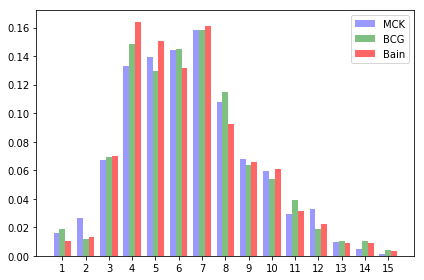

In [31]:
# Visualization
plt.figure(15)
x_index = All_Dummy_Frequency.index
x_data = All_Dummy_Frequency.index
MCK_data = All_Dummy_Frequency["Frequency_MCK"]
BCG_data = All_Dummy_Frequency["Frequency_BCG"]
Bain_data = All_Dummy_Frequency["Frequency"]
bar_width = 0.25

rects1 = plt.bar(x_index, MCK_data, width = bar_width, alpha = 0.4, color = "b", label ='MCK')
rects2 = plt.bar(x_index+bar_width, BCG_data, width = bar_width, alpha = 0.5, color = "g", label ='BCG')
rects3 = plt.bar(x_index+bar_width*2, Bain_data, width = bar_width, alpha = 0.6, color = "r", label ='Bain')

plt.xticks(x_index + bar_width, x_data)
plt.legend()
plt.tight_layout()
plt.show()

> Bain People love writing 4 to 5 letter words in the writing. 

> BCG people prefer 7, 4, 6, 5, 8 letter words, just as Mckinsey people. 

> In the extreme of 13, 14, 15, BCG, Bain, then MCK. 

## BiGram Study
In the end, we would like to look at the collections of different firms. Indeed, what specific phrases the company are using in drafting reports. 

In [32]:
clean_token_MCK = word_tokenize(Mck_c)
MCK_bigrams = nltk.bigrams(clean_token_MCK)
MCK_Bi = nltk.FreqDist(MCK_bigrams)
MCK_Bi_15 = MCK_Bi.most_common(15)
MCK_Bi_15

[(('use', 'case'), 220),
 (('mckinsey', 'global'), 170),
 (('global', 'institute'), 166),
 (('unite', 'state'), 149),
 (('$', 'billion'), 88),
 (('unite', 'kingdom'), 69),
 (('frontier', 'connectivity'), 69),
 (('connectivity', 'providers'), 64),
 (('band', 'g'), 56),
 (('ai', 'technologies'), 50),
 (('european', 'commission'), 48),
 (('european', 'company'), 47),
 (('advance', 'connectivity'), 47),
 (('mckinsey', 'com'), 41),
 (('$', 'trillion'), 41)]

In [33]:
clean_token_BCG = word_tokenize(BCG_c)
BCG_bigrams = nltk.bigrams(clean_token_BCG)
BCG_Bi = nltk.FreqDist(BCG_bigrams)
BCG_Bi_15 = BCG_Bi.most_common(15)
BCG_Bi_15

[(('daimler', 'mobility'), 16),
 (('forward', 'look'), 14),
 (('maturity', 'index'), 11),
 (('source', 'bcg'), 9),
 (('look', 'steer'), 9),
 (('bcg', 'analysis'), 8),
 (('data', 'maturity'), 8),
 (('company', 'must'), 6),
 (('steer', 'process'), 6),
 (('use', 'case'), 5),
 (('bcg', 'com'), 5),
 (('change', 'management'), 5),
 (('bcg', 'data'), 5),
 (('best', 'practice'), 5),
 (('actual', 'performance'), 5)]

In [34]:
clean_token_Bain = word_tokenize(Bain_c)
Bain_bigrams = nltk.bigrams(clean_token_Bain)
Bain_Bi = nltk.FreqDist(Bain_bigrams)
Bain_Bi_15 = Bain_Bi.most_common(15)
Bain_Bi_15

[(('digital', 'transformation'), 33),
 (('economic', 'forum'), 26),
 (('work', 'group'), 26),
 (('bain', 'company'), 25),
 (('world', 'economic'), 25),
 (('operate', 'model'), 23),
 (('case', 'study'), 22),
 (('business', 'model'), 20),
 (('digital', 'technologies'), 19),
 (('asset', 'light'), 19),
 (('vice', 'president'), 19),
 (('forum', 'bain'), 16),
 (('source', 'world'), 15),
 (('digital', 'natives'), 14),
 (('digital', 'technology'), 14)]

# Sentimental Analysis

To conduct the sentimental analysis, here I import the pre-trained model of Vader and Textblob to test the sentiment.
In regarding their potential flaws underlying in their models seperately. I took a look at both in order to 

In [61]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rongbin/nltk_data...


{'compound': 0.9998, 'neg': 0.036, 'neu': 0.821, 'pos': 0.143}

In [108]:
# MCk_C
from textblob import TextBlob
sentence = Mck_c
polarity_mck = TextBlob(sentence).sentiment[0]
subjectivity_mck = TextBlob(sentence).sentiment[1]
V_Mck_Negative = sid.polarity_scores(sentence)['neg']
V_Mck_Positive = sid.polarity_scores(sentence)['pos']
V_Mck_Avg = (V_Mck_Negative + V_Mck_Positive)/2

In [109]:
# BCG overall
sentence = BCG_c
polarity_BCG = TextBlob(sentence).sentiment[0]
subjectivity_BCG = TextBlob(sentence).sentiment[1]
V_BCG_Negative = sid.polarity_scores(sentence)['neg']
V_BCG_Positive = sid.polarity_scores(sentence)['pos']
V_BCG_Avg = (V_BCG_Negative + V_BCG_Positive)/2

In [110]:
# Bain Overall
sentence = Bain_c
TextBlob(sentence).sentiment
polarity_Bain = TextBlob(sentence).sentiment[0]
subjectivity_Bain = TextBlob(sentence).sentiment[1]
V_Bain_Negative = sid.polarity_scores(sentence)['neg']
V_Bain_Positive = sid.polarity_scores(sentence)['pos']
V_Bain_Avg = (V_Bain_Negative + V_Bain_Positive)/2

In [125]:
## Overall
SentimenTable = pd.DataFrame({'index_num': [1,2,3],'polarity' : [polarity_mck, polarity_BCG,polarity_Bain],'Subjectivity':[subjectivity_mck,subjectivity_BCG,subjectivity_Bain],'Vader_Avg':[V_Mck_Avg, V_BCG_Avg, V_Bain_Avg], 'Vader_Neg':[V_Mck_Negative, V_BCG_Negative, V_Bain_Negative],'Vader_Pos':[V_Mck_Positive, V_BCG_Positive, V_Bain_Positive]})
SentimenTable.rename(index={0:'McKinsey',1:'BCG',2:'Bain'}, inplace=False)

,Subjectivity,Vader_Avg,Vader_Neg,Vader_Pos,index_num,polarity
McKinsey,0.373499,0.1050,0.038,0.172,1,0.053227
BCG,0.395412,0.0895,0.036,0.143,2,0.119611
Bain,0.389258,0.1215,0.047,0.196,3,0.116029


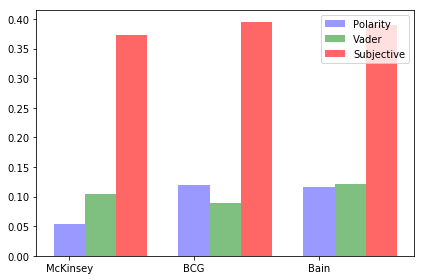

In [132]:
plt.figure(15)
x_index = SentimenTable["index_num"]
x_data = SentimenTable.index
Polarity_data = SentimenTable["polarity"]
Vader_data = SentimenTable["Vader_Avg"]
Subjective_data = SentimenTable["Subjectivity"]
bar_width = 0.25

rects1 = plt.bar(x_index, Polarity_data, width = bar_width, alpha = 0.4, color = "b", label ='Polarity')
rects2 = plt.bar(x_index+bar_width, Vader_data, width = bar_width, alpha = 0.5, color = "g", label ='Vader')
rects3 = plt.bar(x_index+2*bar_width, Subjective_data, width = bar_width, alpha = 0.6, color = "r", label ='Subjective')

plt.xticks(x_index, ('McKinsey','BCG','Bain'))
plt.legend()
plt.tight_layout()
plt.show()

From the comparison, one can tell. Surprisingly, the BCG has more positive sentiments and more subjective at the same time. This might be the reason why it is one of the top consulting firm. Yet, one has to consider the limited data set in this case and subtle differences in the document selected. 


# Summary of Finding

> 1. Text Cleaning is indeed a hard and lasting effort. 

> 2. Words Chose: Bain focuses on 4 words, MCK around 7 to 4, BCG around 7 - 8. Furthermore, the BCG consultants are likely to talk more about complex concepts. 

> 3. Self-Reference: The Bigram demonstrates that in the chosen article, BCG mentioned its sub-organziation the most. The frequency is, from most to least, BCG > MCkinsey > Bain. 

> 4. In the chosen articles, BCG demonstrate more positive intonation and more subjectivity in the case. 

## What can be improved:

> Data Selection should be automized, which require more understanding in the RSelenium in Python and JSON/PHP knowledge. Current Data have some advantages and being preliminary clarified. 

> Analysis in the unit of Sentence. The current analysis is staying at stage of the whole text body or by word. If we are able to break the text body into sentence, more analysis could be focusing on the more subtle side of these documents. 

## Expectation To the Future:

> There is a probability of developing a classifer/generator which can write in a way of consultant, not the monkey typing shapespare. 